# Visualizations of Regional Pathways

This notebook is used to create visualizations on the pathways given the selected policies and 50 bad scenarios.

## Imports

In [1]:
from dmdu.general.visualization import plot_regional_pathways
from model.enumerations import ProblemFormulation
import matplotlib.pyplot as plt
import os
import pandas as pd
from ema_workbench import load_results

## Directory

In [2]:
target_directory = os.path.join(
    os.path.dirname(os.getcwd()),
    'data',
    'experiments_bad'
)

## Parameters

In [3]:
problem_formulations = [

    ProblemFormulation.UTILITARIAN_AGGREGATED,
    ProblemFormulation.UTILITARIAN_DISAGGREGATED,
    ProblemFormulation.SUFFICIENTARIAN_AGGREGATED,
    ProblemFormulation.SUFFICIENTARIAN_DISAGGREGATED,
    ProblemFormulation.EGALITARIAN_AGGREGATED,
    ProblemFormulation.EGALITARIAN_DISAGGREGATED,
    ProblemFormulation.PRIORITARIAN_AGGREGATED,
    ProblemFormulation.PRIORITARIAN_DISAGGREGATED,
]

n_references = 4
n_seeds = 2

problem_formulations_dict = {}

## Load results

In [4]:
for problem_formulation in problem_formulations:

    # Define path to load data from
    file = f'results_regional_{problem_formulation.name}'
    path = os.path.join(target_directory, file)

    # Load results
    _, outcomes = load_results(path)
    outcomes = pd.DataFrame(outcomes)
    print(f'{problem_formulation}: \t {len(outcomes)/50}')
    problem_formulations_dict[problem_formulation.name] = outcomes

ProblemFormulation.UTILITARIAN_AGGREGATED: 	 12.0
ProblemFormulation.UTILITARIAN_DISAGGREGATED: 	 15.0
ProblemFormulation.SUFFICIENTARIAN_AGGREGATED: 	 12.0
ProblemFormulation.SUFFICIENTARIAN_DISAGGREGATED: 	 14.0
ProblemFormulation.EGALITARIAN_AGGREGATED: 	 18.0
ProblemFormulation.EGALITARIAN_DISAGGREGATED: 	 12.0
ProblemFormulation.PRIORITARIAN_AGGREGATED: 	 14.0
ProblemFormulation.PRIORITARIAN_DISAGGREGATED: 	 16.0


## Visualizations

[]

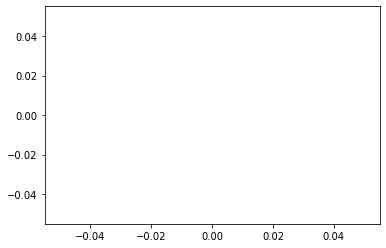

In [5]:
plt.plot()

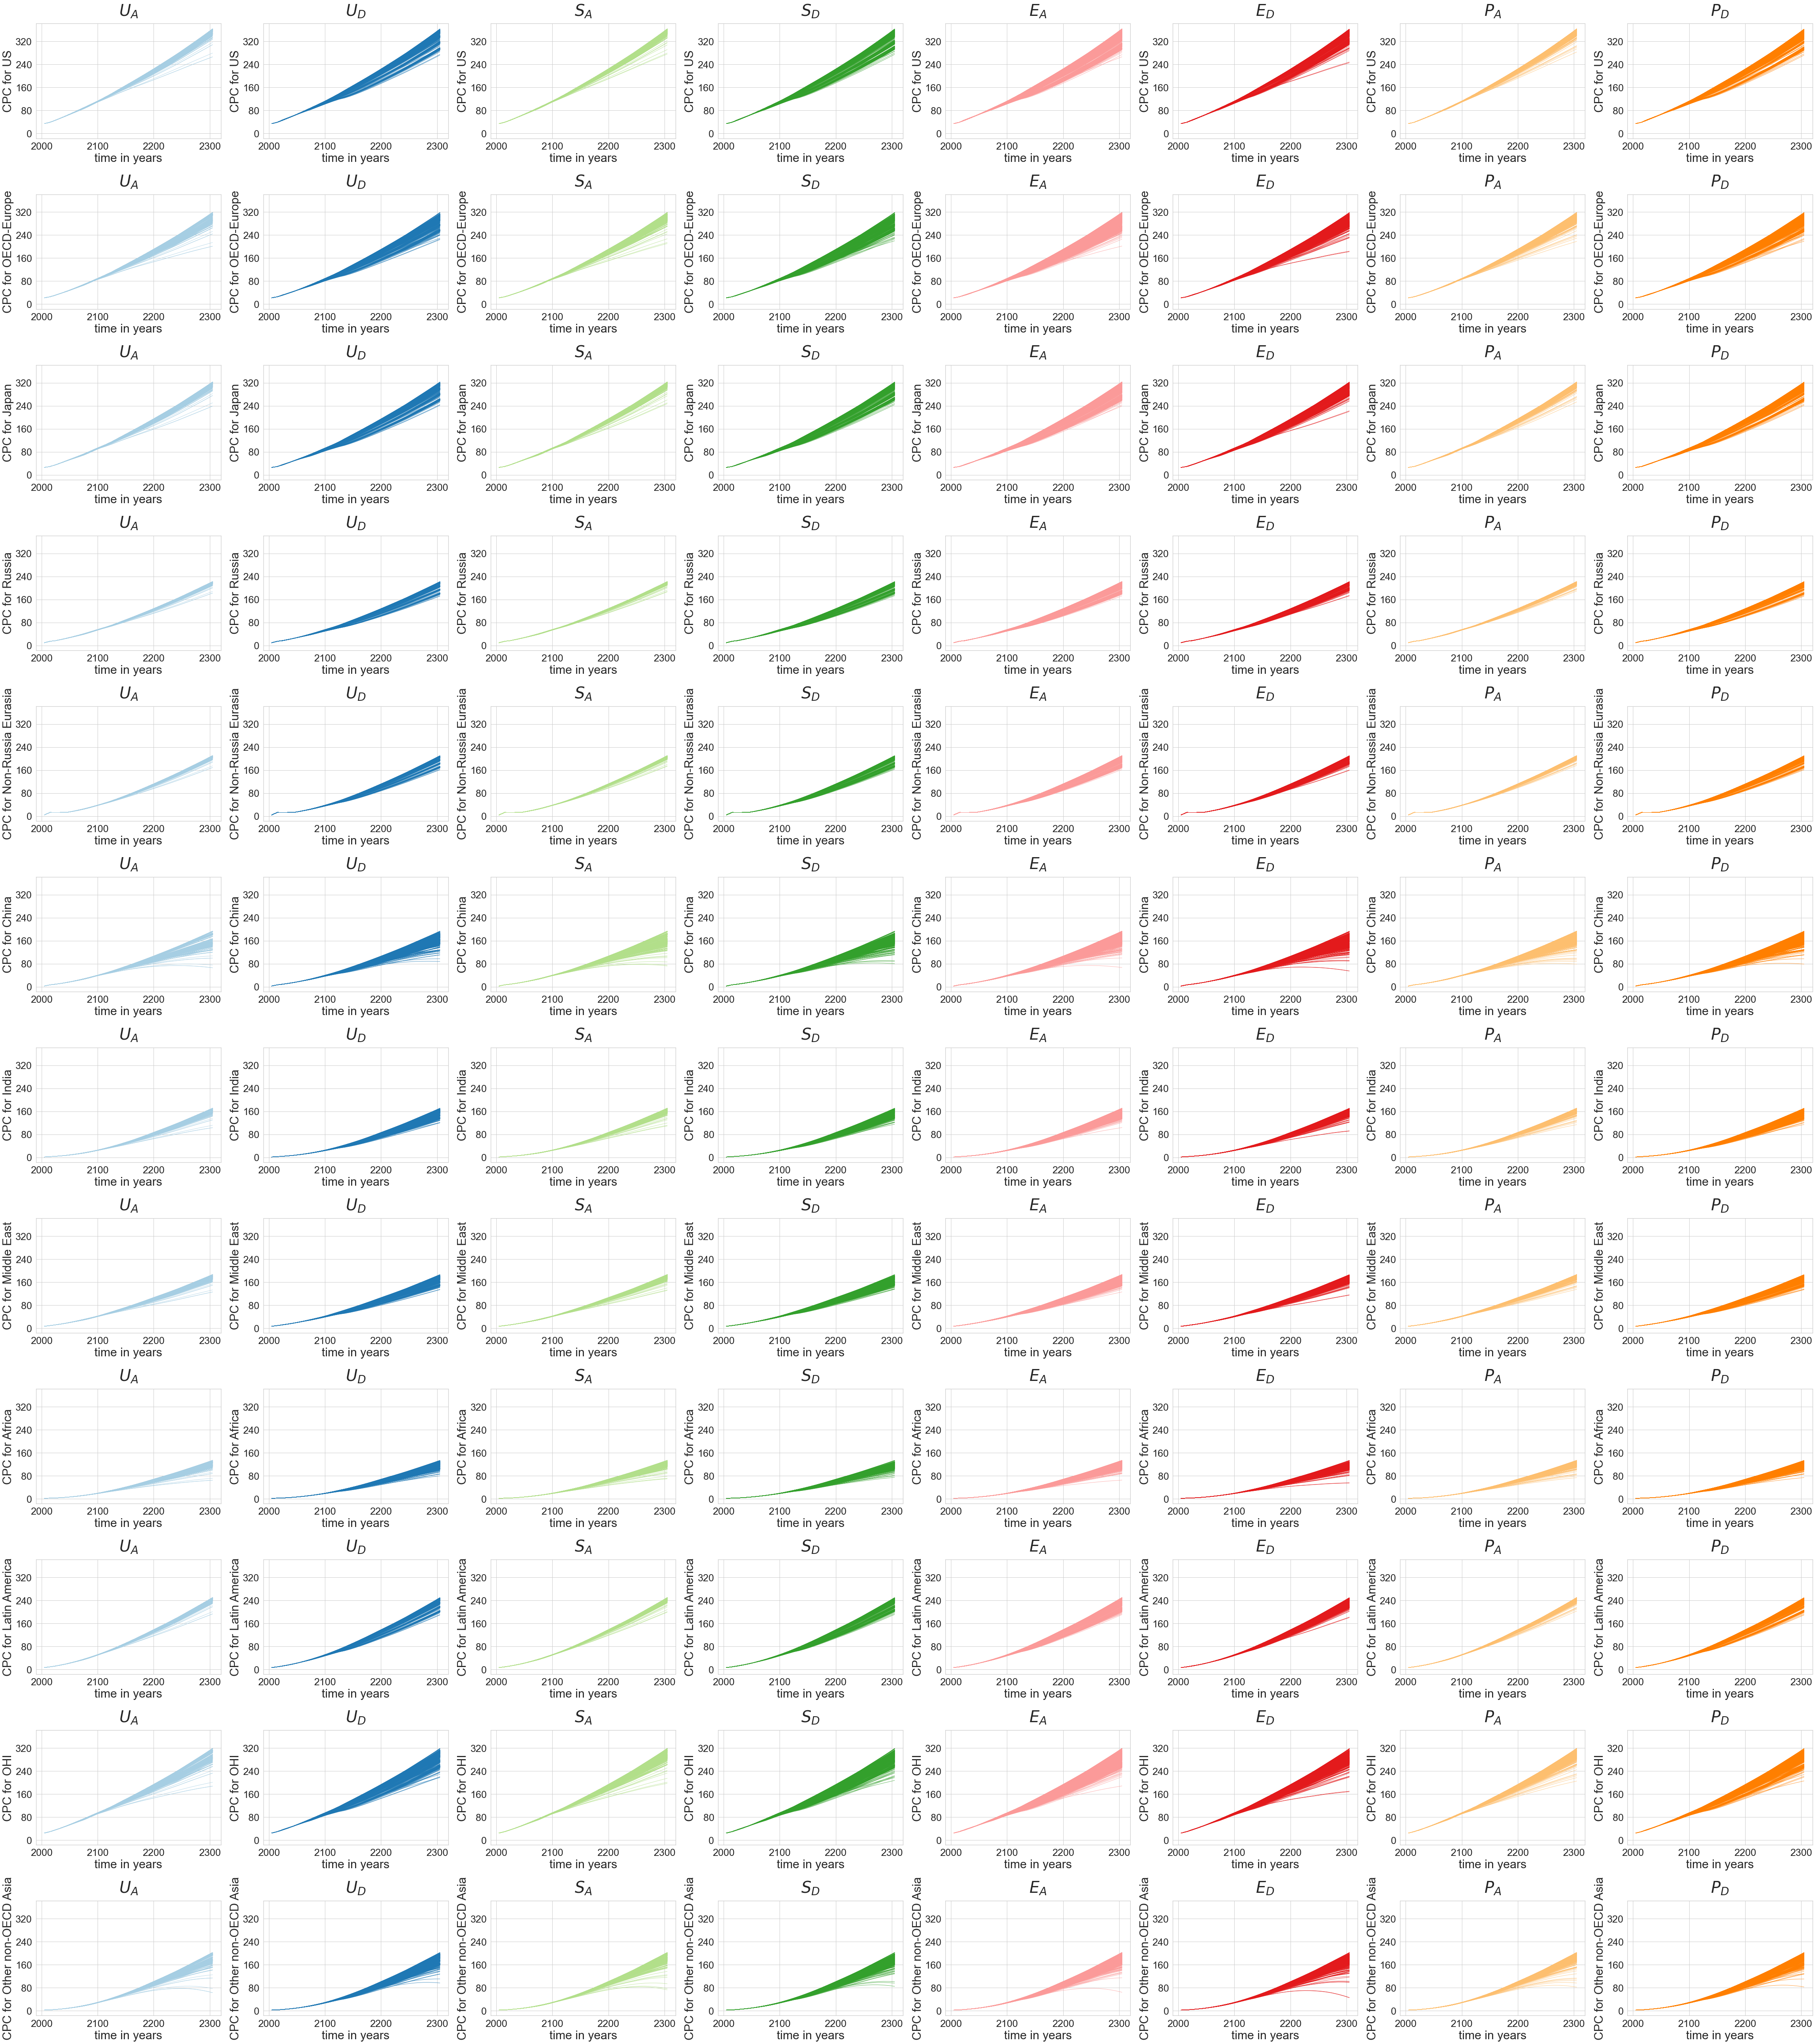

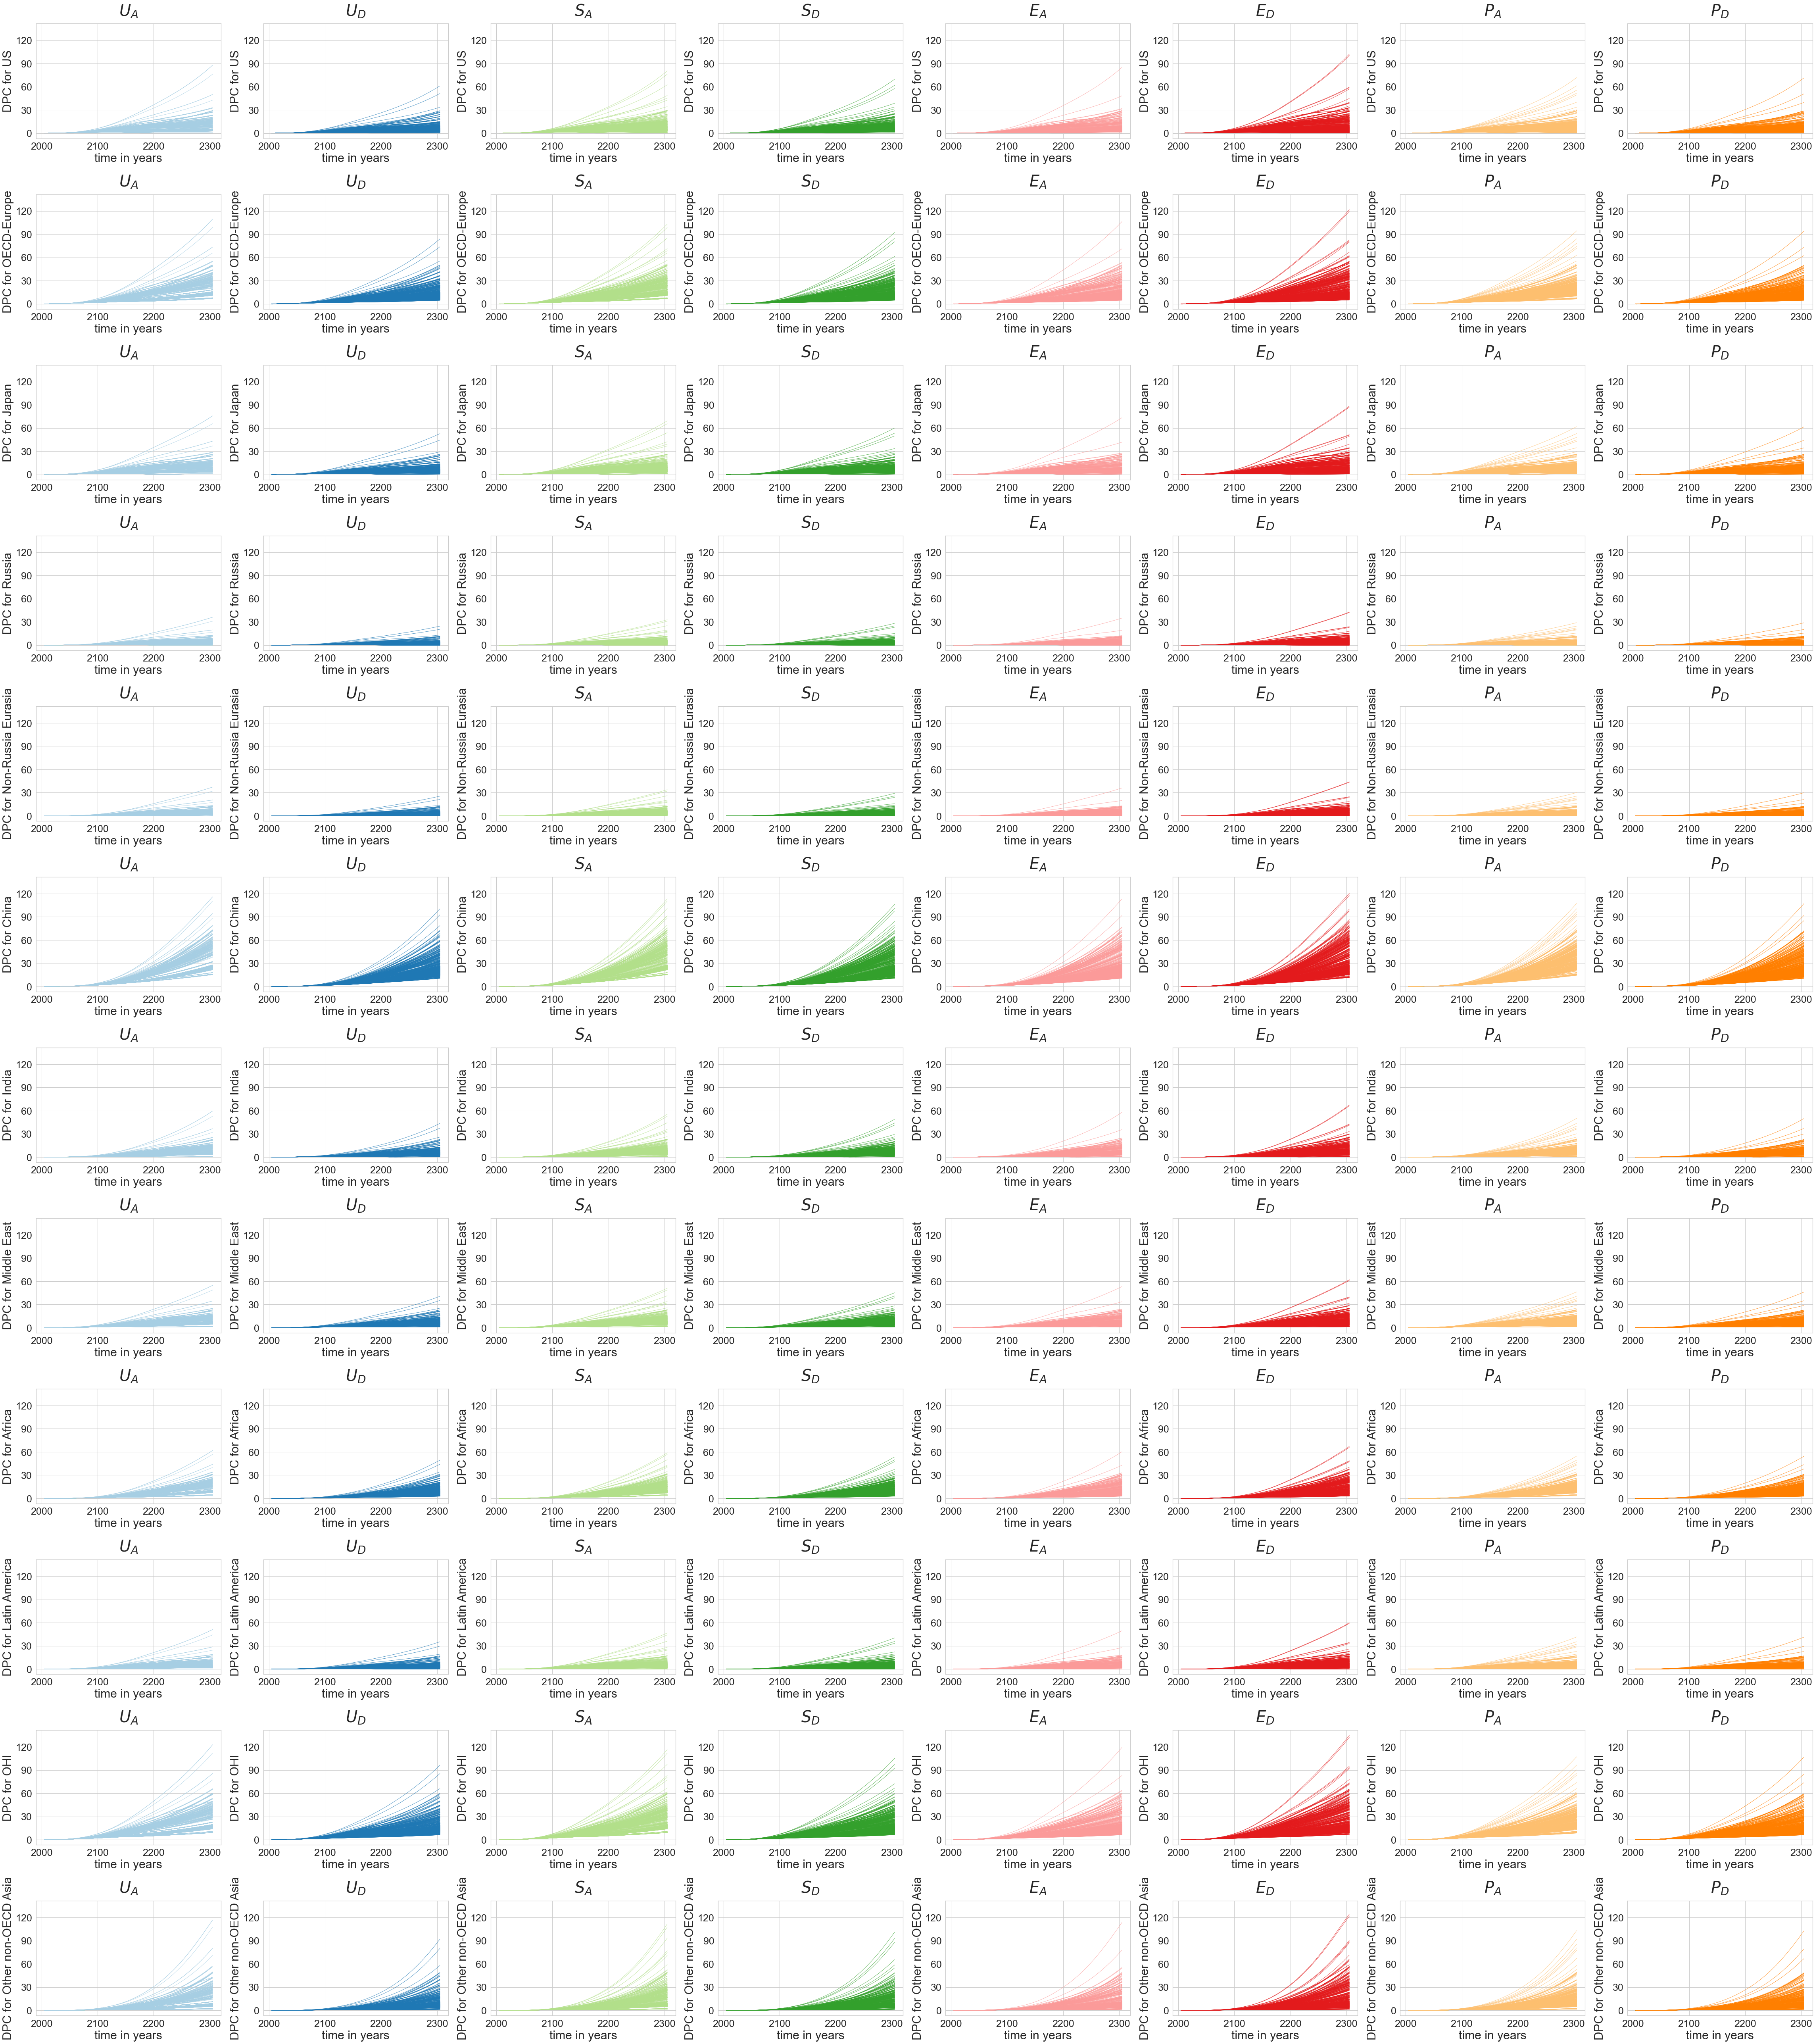

In [6]:
outcome_names = [
    'Regional CPC',
    'Regional DPC'
]

regions_list = [
    "US",
    "Africa",
]

pf_names = list(set([pf.name[0] for pf in problem_formulations]))

for outcome_name in outcome_names:

    plot_regional_pathways(
        problem_formulations_dict=problem_formulations_dict,
        outcome_name=outcome_name,
        # regions_list=regions_list,
        saving=True,
        file_name=f'regional_pathways_{outcome_name}_{pf_names[0]}' if len(pf_names) == 1 else f'regional_pathways_all_{outcome_name}',
        resolution=75,
    )

## Extra code

The code below is used to put some of the figures together. It's just for the report.

In [7]:
# from matplotlib import pyplot as plt
#
# image_folder = os.path.join(
#     os.path.dirname(os.path.dirname(os.getcwd())),
#     'outputimages',
#     'pathways'
# )
#
# images = []
#
# image_names = [
#     'regional_pathways_Regional CPC_U.png',
#     'regional_pathways_Regional CPC_P.png',
#     'regional_pathways_Regional DPC_U.png',
#     'regional_pathways_Regional DPC_P.png',
# ]
#
# for image_name in image_names:
#     img = plt.imread(os.path.join(image_folder, image_name))
#     images.append(img)
#
# fig, axes = plt.subplots(2, 2, figsize=(28,22))
# plt.subplots_adjust(wspace=0.2, hspace=0.2)
# axes[0,0].imshow(images[0])
# axes[0,1].imshow(images[1])
# axes[1,0].imshow(images[2])
# axes[1,1].imshow(images[3])
#
# axes[0,0].axis('off')
# axes[1,0].axis('off')
# axes[0,1].axis('off')
# axes[1,1].axis('off')
#
# path = os.path.join(image_folder, 'some_regional_pathways.png')
# fig.savefig(path, dpi=150, bbox_inches='tight')